# KNN for the Adult Dataset

### Author: Luana Passos Reis, NUSP: 11224845

##### PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

We are going to produce a classifier for the variable Target (that is, whether the income is <= 50K or > 50K) for the Adult Dataset. The classifier is a kNN where k is selected through cross validation.


The Adult dataset that can be found in here -> https://archive.ics.uci.edu/ml/index.php

#### Imports

First, a few common imports for data analysis.

Some other imports that are important fot a determined specific analysis are going to be imported throughout the notebook.

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#### Datasets

Let's start by loading the datasets

In [131]:
train_df = pd.read_csv("/Users/luanareis/Documents/KNN_ML/train_data.csv")

test_df = pd.read_csv("/Users/luanareis/Documents/KNN_ML/test_data.csv")

In [132]:
train_df

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


In [133]:
test_df

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,Private,168113,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
16276,16276,30,Local-gov,327203,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
16277,16277,25,Private,116358,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines
16278,16278,60,Private,39263,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,3325,0,35,United-States


# Data Prep

First, let's look into the Training Dataset by obtaining its information,

In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  32560 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


We have a few $\textbf{continuous}$ $\textbf{variables}$, such as:

- age,
- fnlwgt,
- education-num,
- capital-gain,
- capital-loss,
- hours-per-week,

and a few $\textbf{discrete}$ ones:

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



We can start by looking at some simple initial statistics about our data

In [135]:
train_df.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see some information about the continuous features, as the mean, standard deviation, the minimum, maximum and in between values of the entire dataset.

Let's play around a little bit and look into how the features affect the $\textbf{income}$, that is the Target variable we are interested in predicting. By playing around with how many counts we have for each feature entry, and trying to visualize our dataset.

In [136]:
# Setting the color palette
sns.set_palette(sns.color_palette('Set2'))

# Analyzing features:

### Should we use them to train the Dataset?

## Discrete Features

### Native Country

In [137]:
## Value Counts

train_df['native.country'].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

<AxesSubplot:title={'center':'Native Country'}>

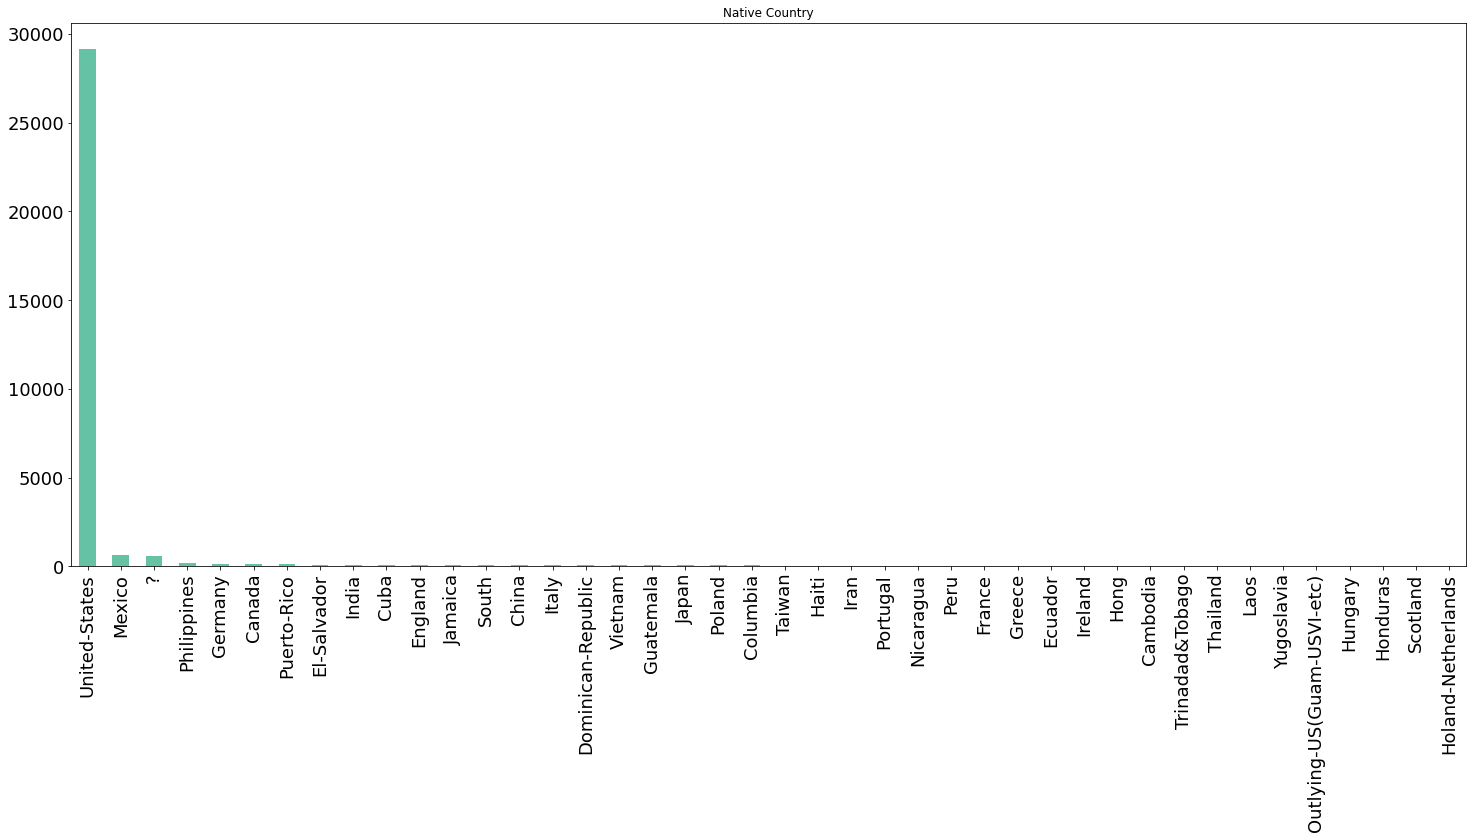

In [138]:
## Bar plotting the feature

train_df['native.country'].value_counts().plot(kind='bar', figsize=(25,10), title='Native Country', fontsize=18)

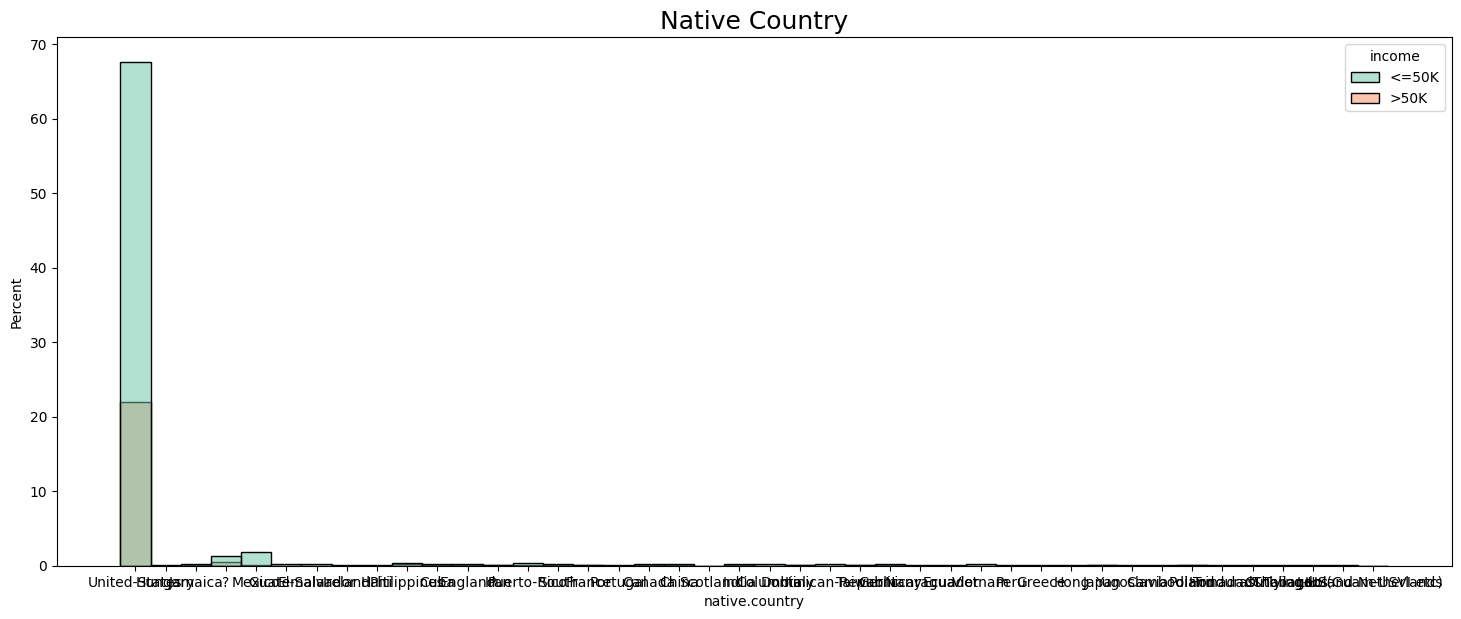

In [139]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='native.country', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Native Country', fontsize=18)
plt.show()

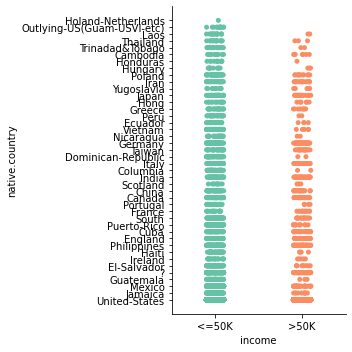

In [140]:
## Normalized Distribution

sns.catplot(x='income', y='native.country', data=train_df)

In [141]:
## Analysis of the feature

WOW! We can clearly see that we have WAY more data of people from the United States than all the other countries!


In this dataset, comparing only the native country, we have 45x more people from United States than from Mexico, which is the second largest nationality in this dataset.


And still, the distribution of Income between <=50K and >50K doesn't seem to be that different if we only rely on the country, comparing for example United States with Poland, Japan, China and Canada.


We have 470x more people from US than from Japan in this dataset \o/. And the distribution of Income in both countries look alike, then, the Native Country might not the a huge factor in our comparing, probably other features will be more relevant. 

### Education

In [142]:
## Value Counts

train_df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

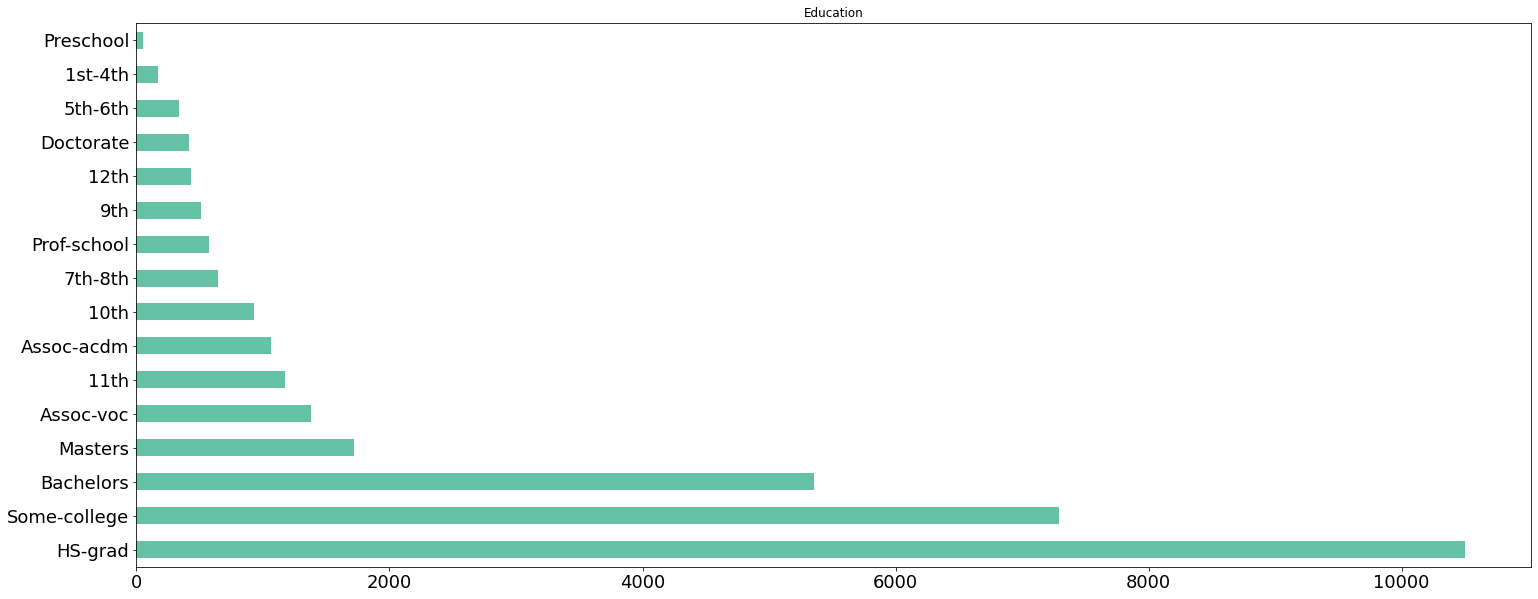

In [143]:
## Bar plotting the feature

train_df['education'].value_counts().plot(kind='barh', figsize=(25,10), title='Education', fontsize=18)

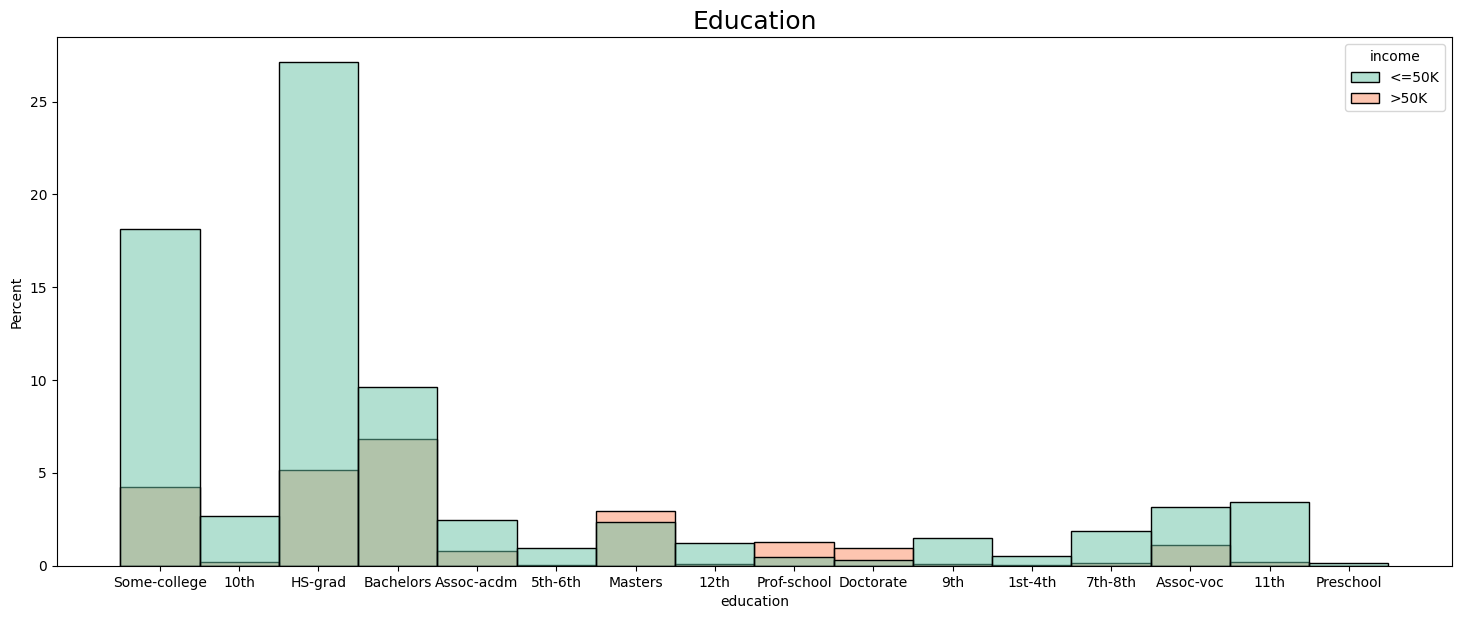

In [144]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='education', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Education', fontsize=18)
plt.show()

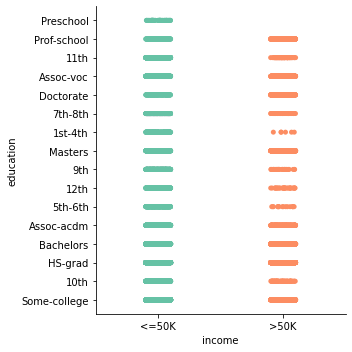

In [145]:
## Normalized Distribution

sns.catplot(x='income', y='education', data=train_df)

In [146]:
## Analysis of the feature

Well, the ones that only have Preschool degree does not make more than >50K, noted. And the ones with 1st-4th grade education usually make <=50K. While for Masters and PhDs, most of them make >50K. Conclusion: Education is clearly relevant in our comparison.

### Occupation

In [147]:
## Value Counts

train_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:title={'center':'Occupation'}>

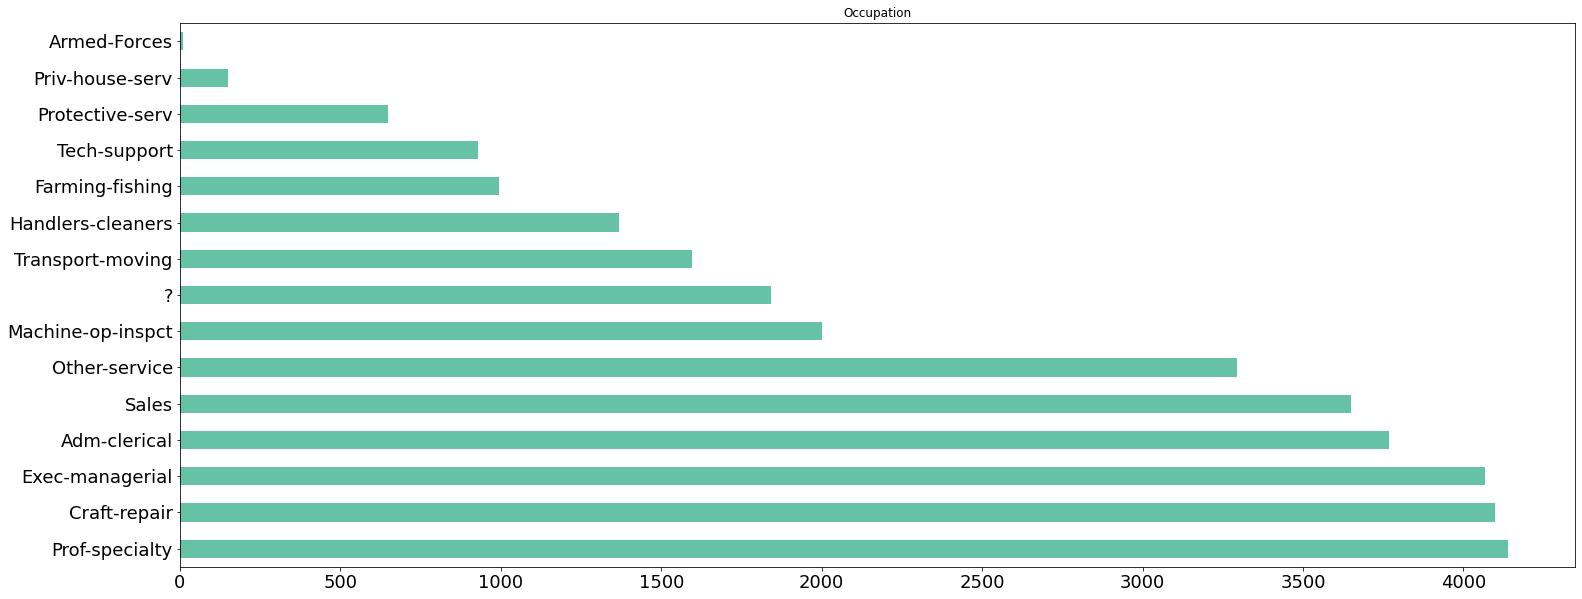

In [148]:
## Bar plotting the feature

train_df['occupation'].value_counts().plot(kind='barh', figsize=(25,10), title='Occupation', fontsize=18)

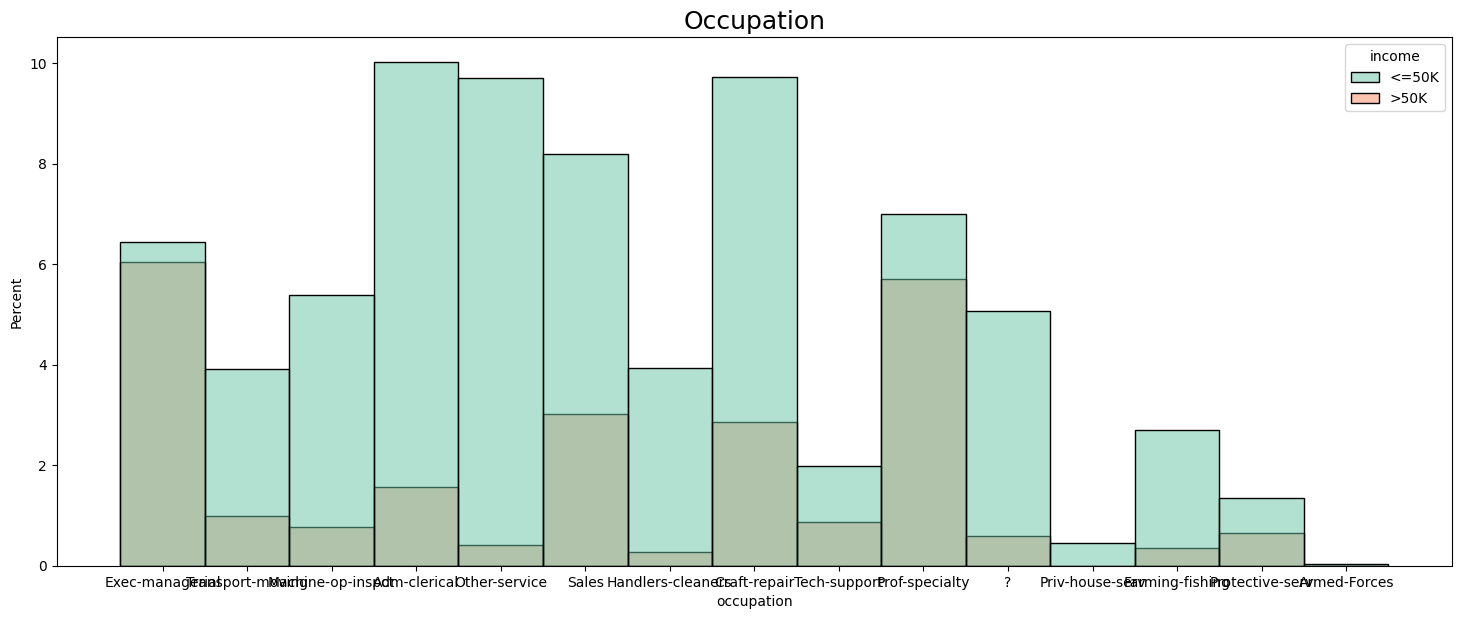

In [149]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='occupation', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Occupation', fontsize=18)
plt.show()

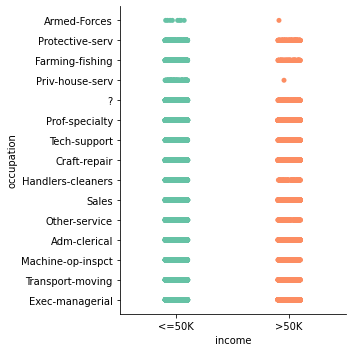

In [150]:
## Normalized Distribution

sns.catplot(x='income', y='occupation', data=train_df)

In [151]:
## Analysis of the feature

There are clearly a few occupations that tend to make >50K for Income than others, we should definitely take this feature into account when predicting.

### Workclass

In [152]:
## Value Counts

train_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:title={'center':'Workclass'}>

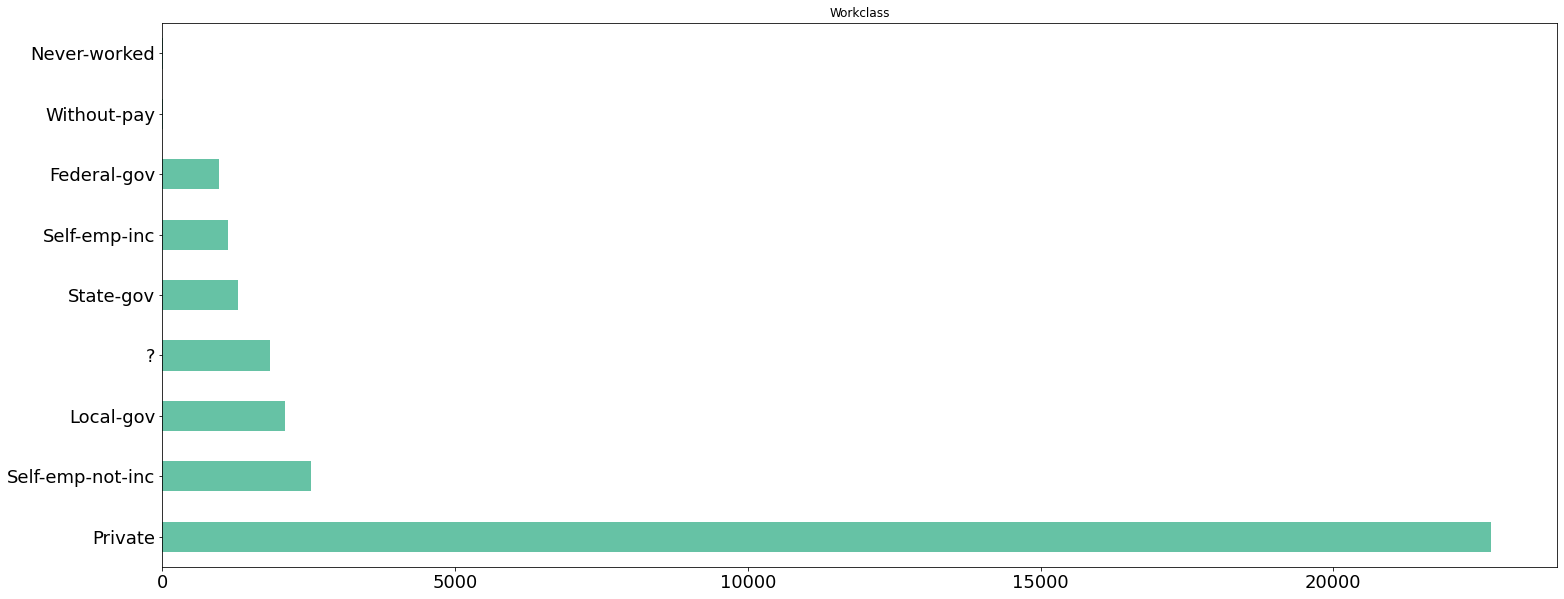

In [153]:
## Bar plotting the feature

train_df['workclass'].value_counts().plot(kind='barh', figsize=(25,10), title='Workclass', fontsize=18)

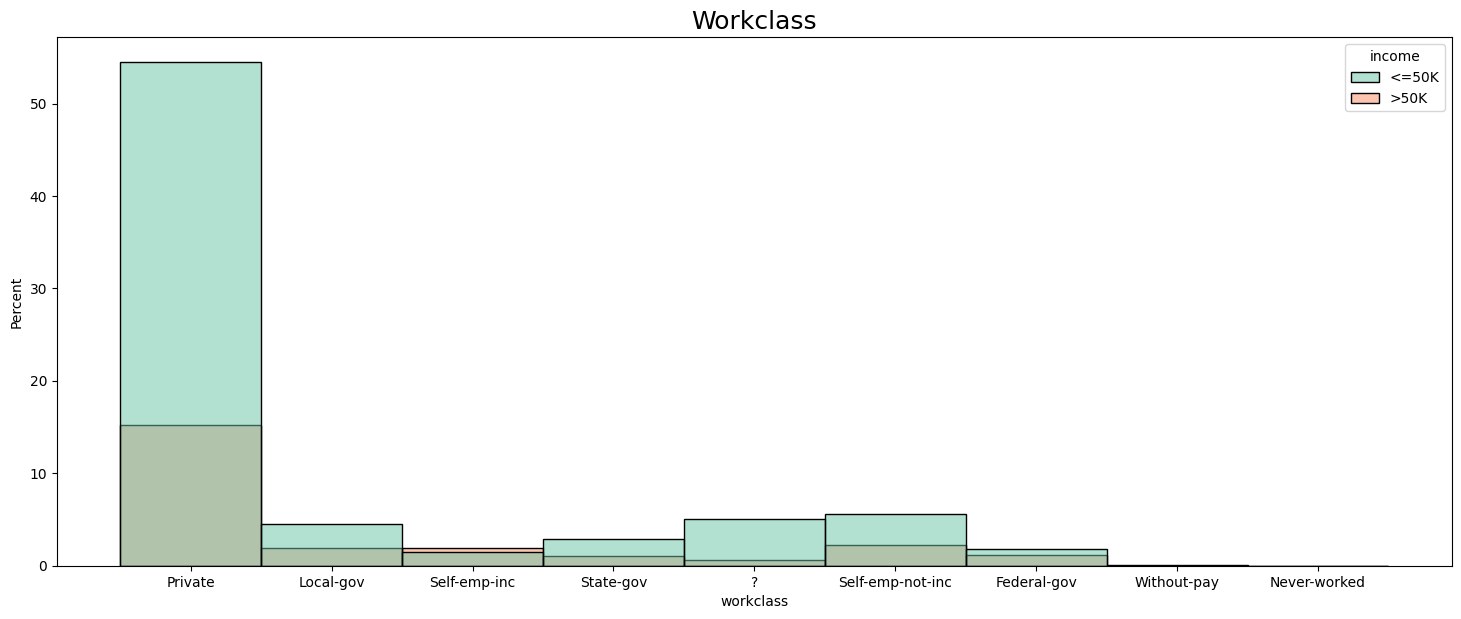

In [154]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='workclass', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Workclass', fontsize=18)
plt.show()

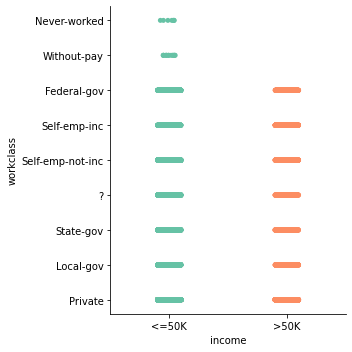

In [155]:
## Normalized Distribution

sns.catplot(x='income', y='workclass', data=train_df)

In [156]:
## Analysis of the feature

While the ones in a workclass without-pay and the ones that never worked only makes <=50K, the self employed ones tends to make >50K in this training dataset. Then, we should consider this feature for the analysis.

### Marital Status

In [157]:
## Value Counts

train_df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

<AxesSubplot:title={'center':'Marital Status'}>

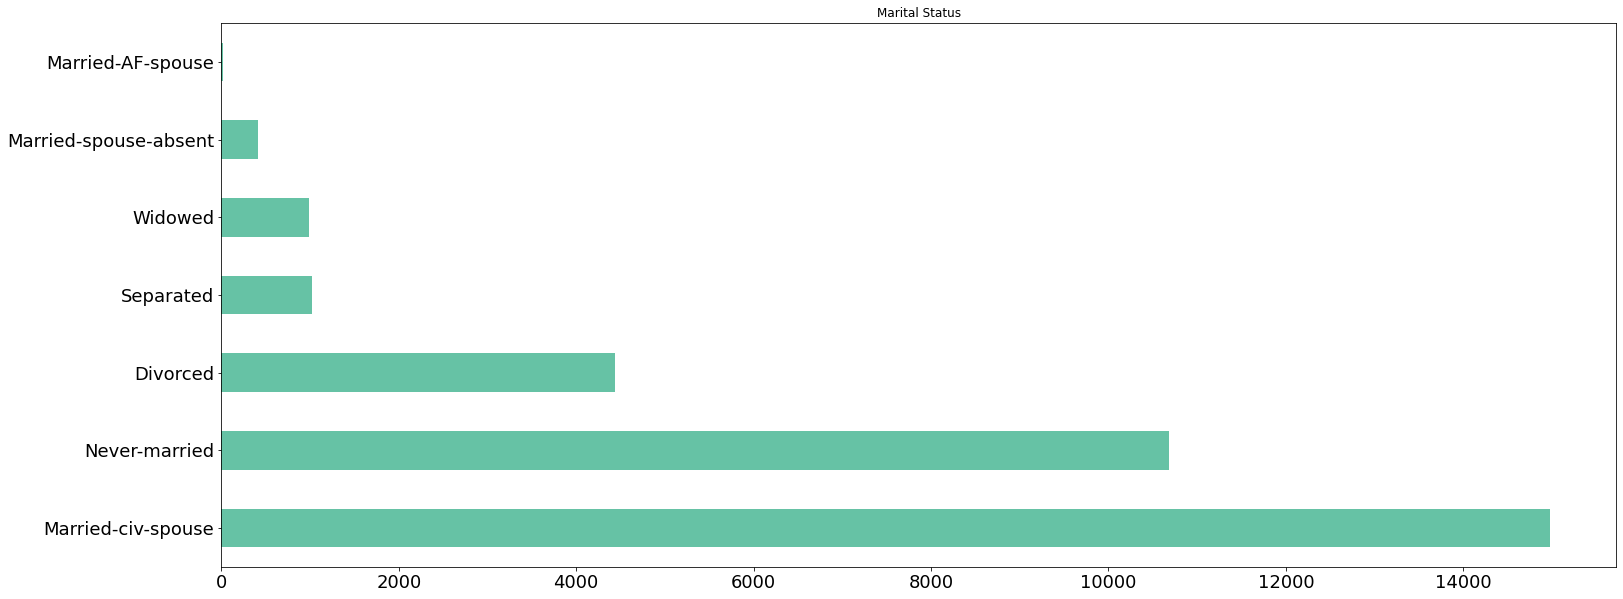

In [158]:
## Bar plotting the feature

train_df['marital.status'].value_counts().plot(kind='barh', figsize=(25,10), title='Marital Status', fontsize=18)

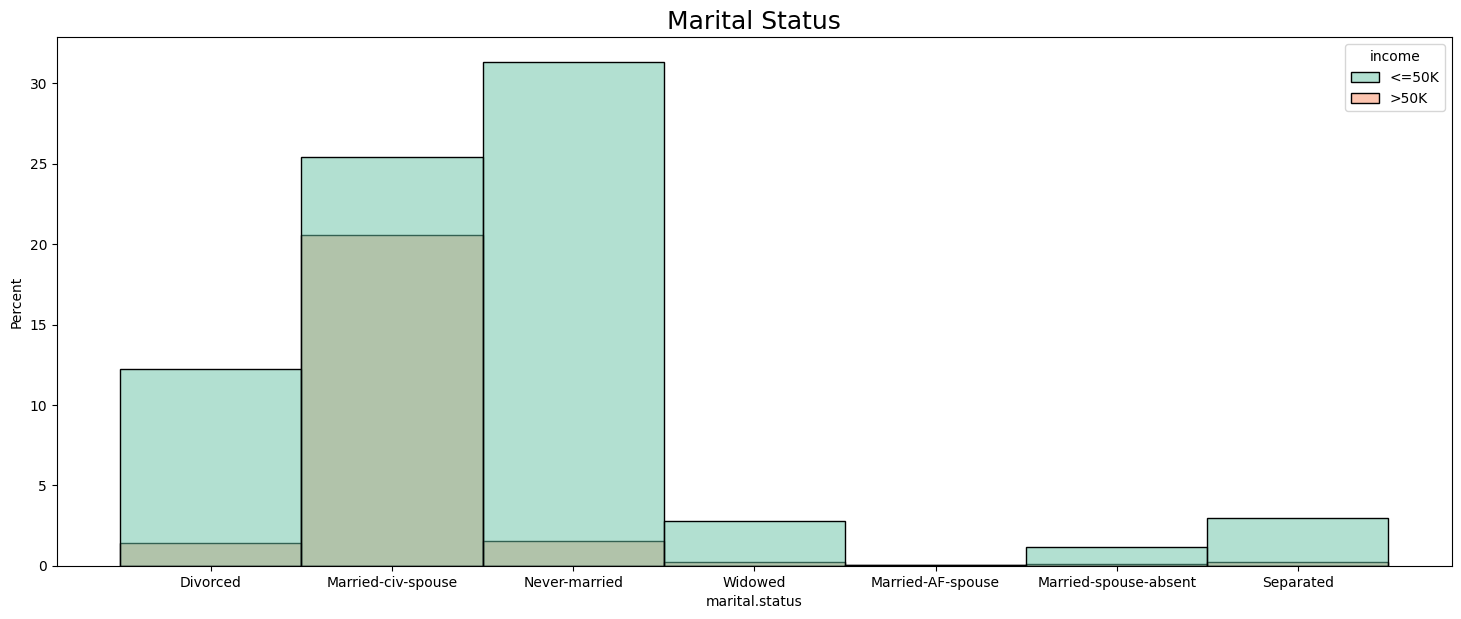

In [159]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='marital.status', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Marital Status', fontsize=18)
plt.show()

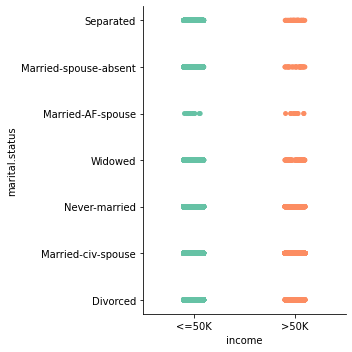

In [160]:
## Normalized Distribution

sns.catplot(x='income', y='marital.status', data=train_df)

In [161]:
## Analysis of the feature

Even though it doesn't seem to have an important role in classifying, the ones classified as a married-civ-spouse has a big >50K statistic and might help our classifier to more accurate learning.

### Relationship

In [162]:
## Value Counts

train_df['relationship'].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

<AxesSubplot:title={'center':'Relationship'}>

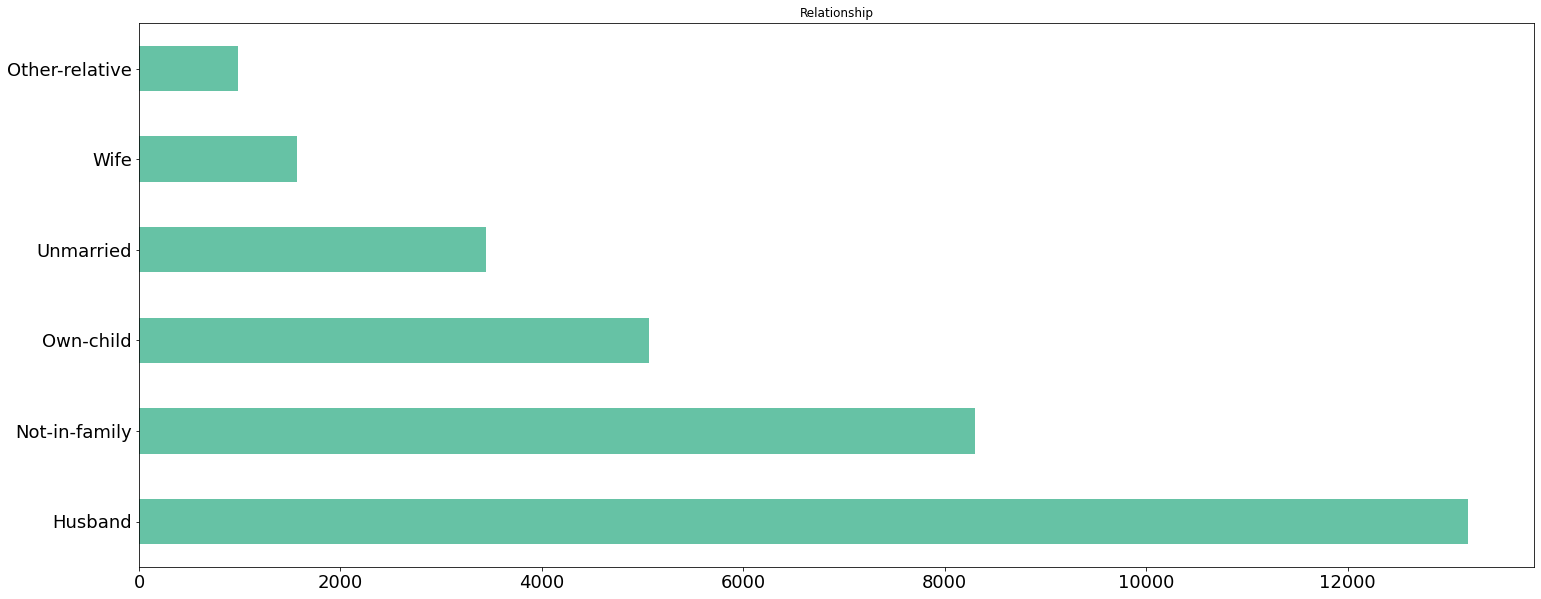

In [163]:
## Bar plotting the feature

train_df['relationship'].value_counts().plot(kind='barh', figsize=(25,10), title='Relationship', fontsize=18)

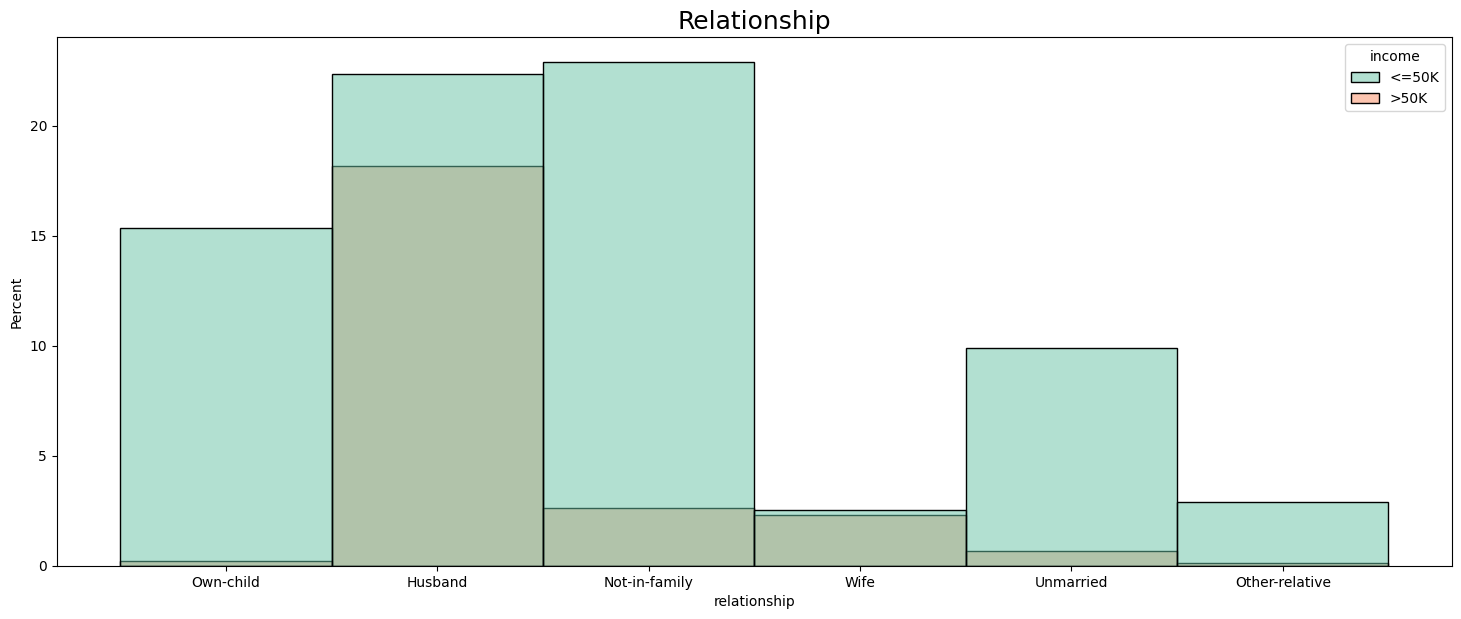

In [164]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='relationship', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Relationship', fontsize=18)
plt.show()

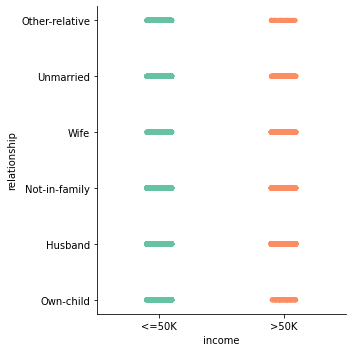

In [165]:
## Normalized Distribution

sns.catplot(x='income', y='relationship', data=train_df)

In [166]:
## Analysis of the feature

Of the total percentage of Husband and Wives from this dataset, they tend to make >50K is a bigger statistics than the ones that are not-in-family, unmarried or other-relative ones, and that can help our classifier to predict.

### Sex

In [167]:
## Value Counts

train_df['sex'].value_counts()

Male      21789
Female    10771
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Sex'}>

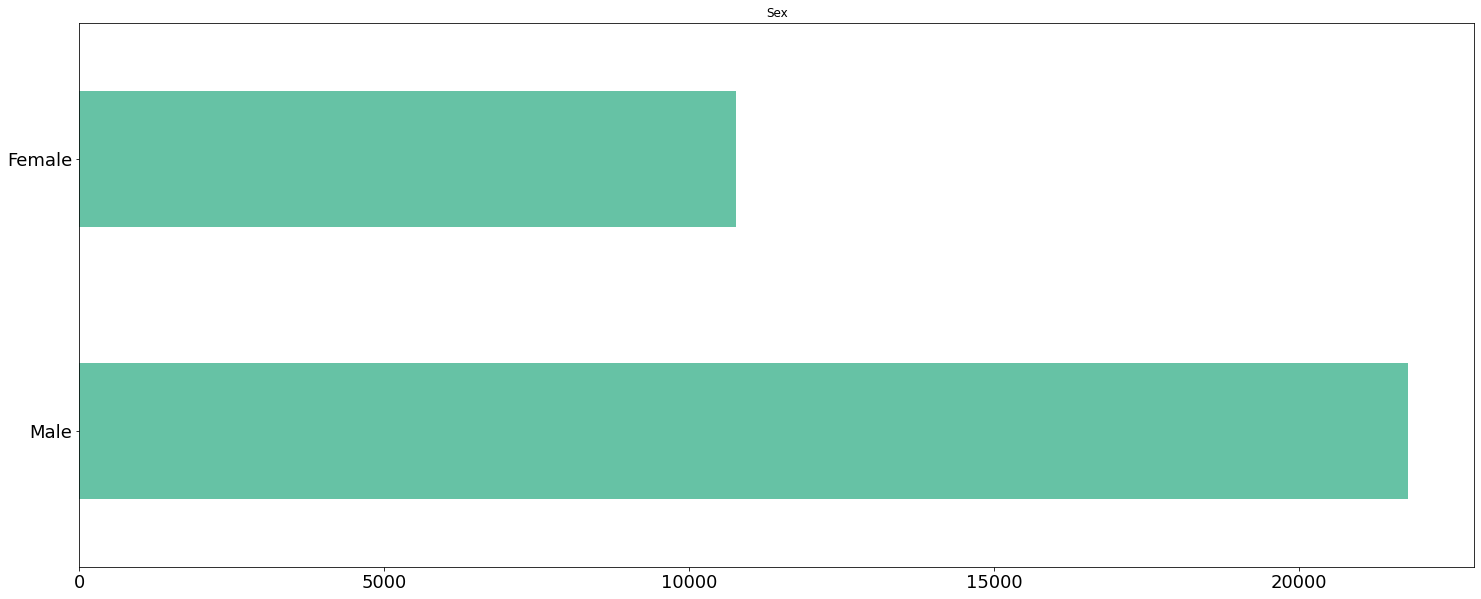

In [168]:
## Bar plotting the feature

train_df['sex'].value_counts().plot(kind='barh', figsize=(25,10), title='Sex', fontsize=18)

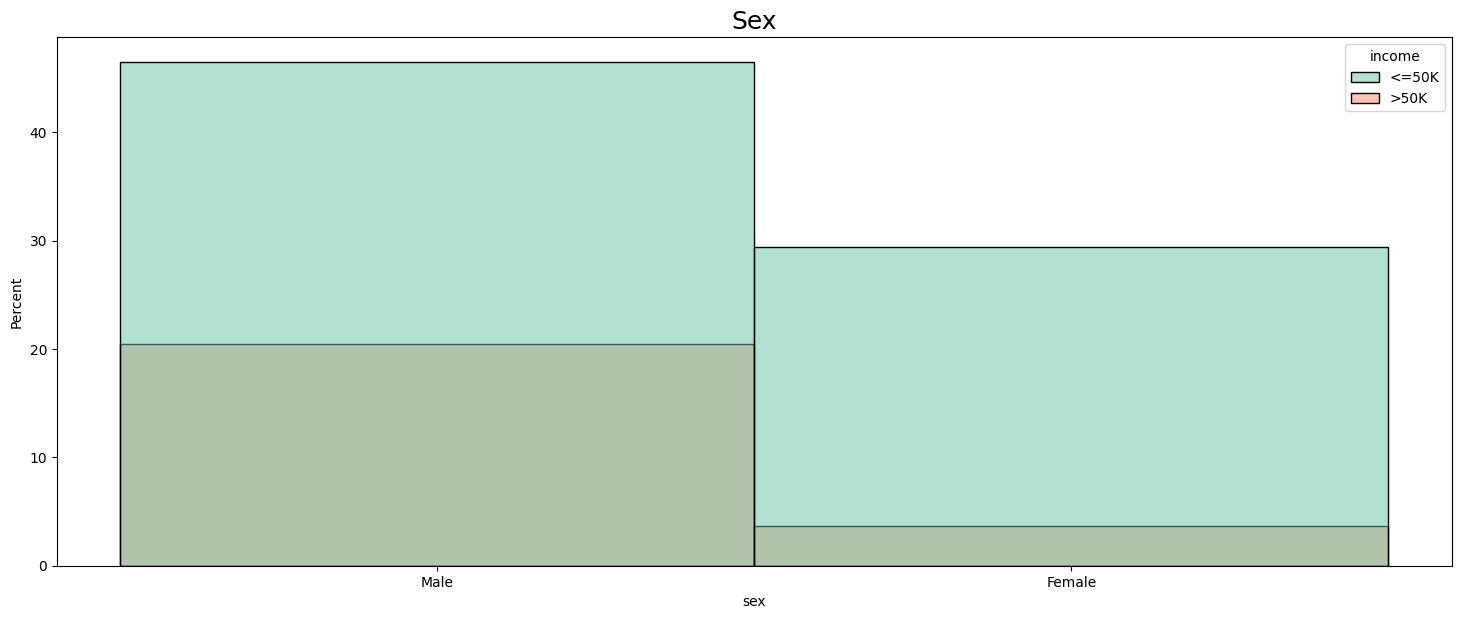

In [169]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='sex', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Sex', fontsize=18)
plt.show()

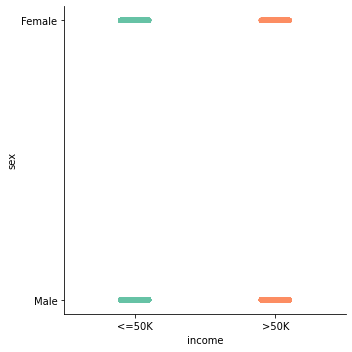

In [170]:
## Normalized Distribution

sns.catplot(x='income', y='sex', data=train_df)

In [171]:
## Analysis of the feature

Clearly there is a difference between Male and Female in the Histogram Survey, but it does not look that significant in comparison to other features, than, we don't need to take this factor into account when training the classifier.

### Race

In [172]:
## Value Counts

train_df['race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:title={'center':'Race'}>

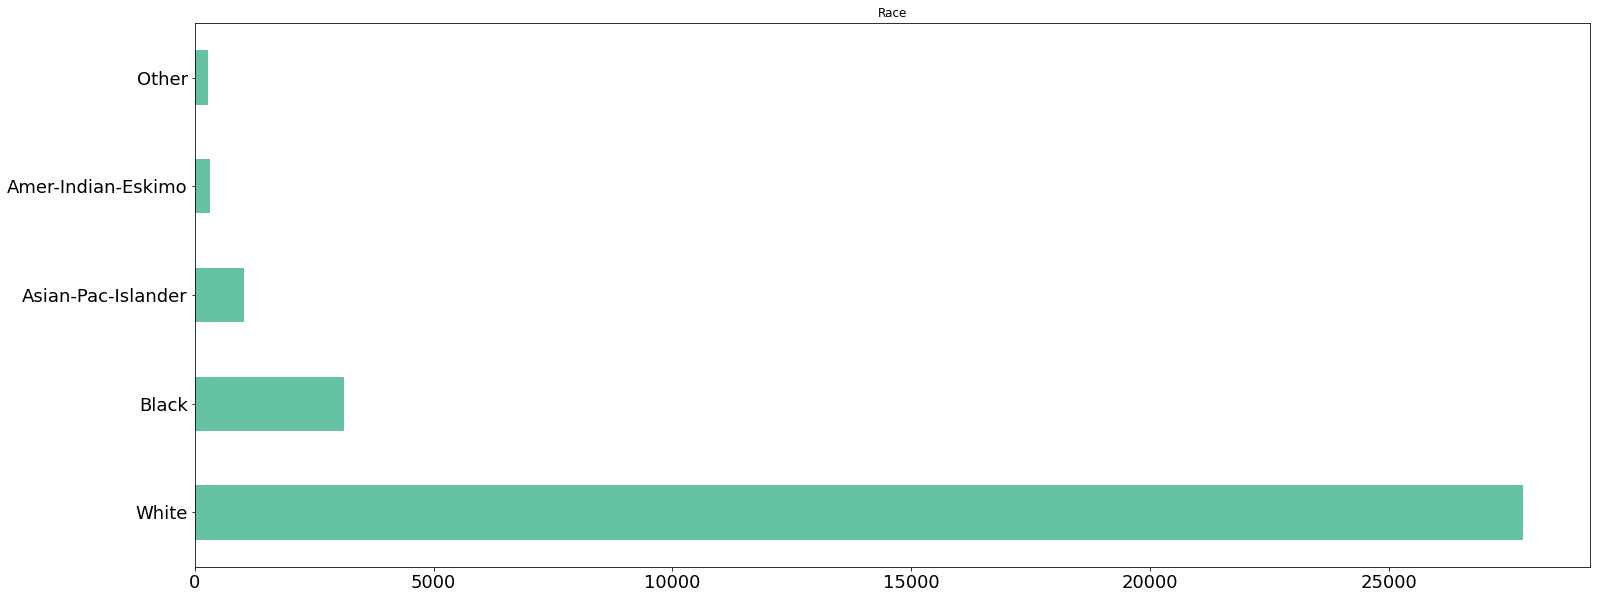

In [173]:
## Bar plotting the feature

train_df['race'].value_counts().plot(kind='barh', figsize=(25,10), title='Race', fontsize=18)

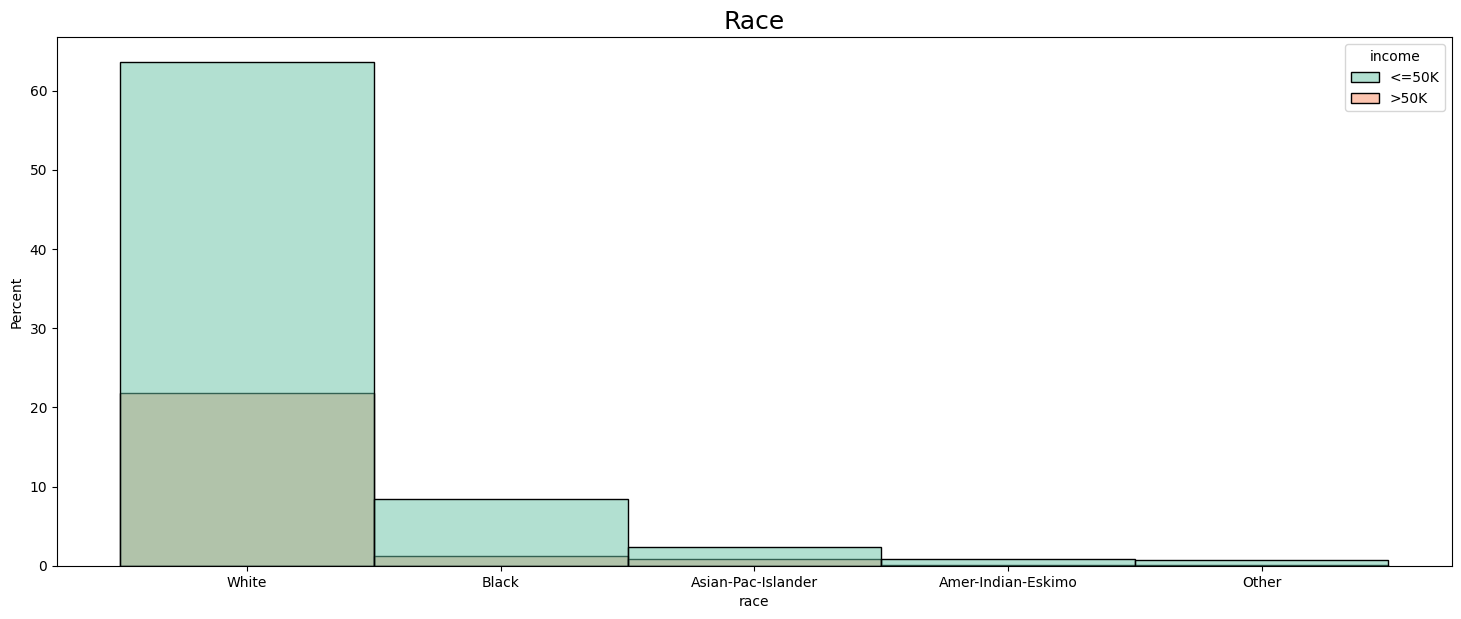

In [174]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='race', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Race', fontsize=18)
plt.show()

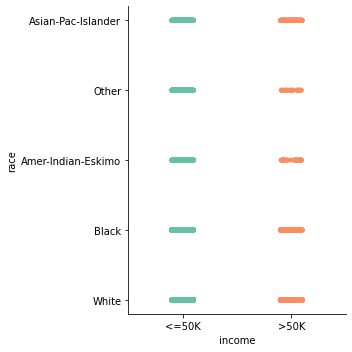

In [175]:
## Normalized Distribution

sns.catplot(x='income', y='race', data=train_df)

In [176]:
## Analysis of the feature

As the Sex feature, the Race clearly does have a difference, but in the normalized distribution the significance of this difference doesn't need to be taken into the training set.

## Continuous Features

### Age

In [177]:
## Value Counts

train_df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

<AxesSubplot:xlabel='income', ylabel='age'>

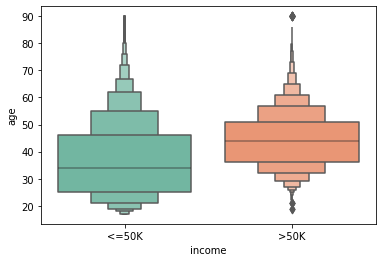

In [178]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='age')

<AxesSubplot:xlabel='income', ylabel='age'>

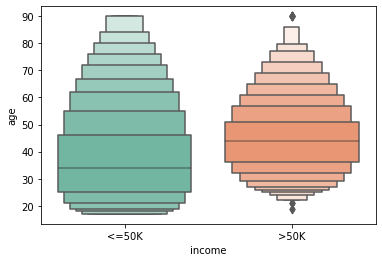

In [179]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='age', scale='linear')

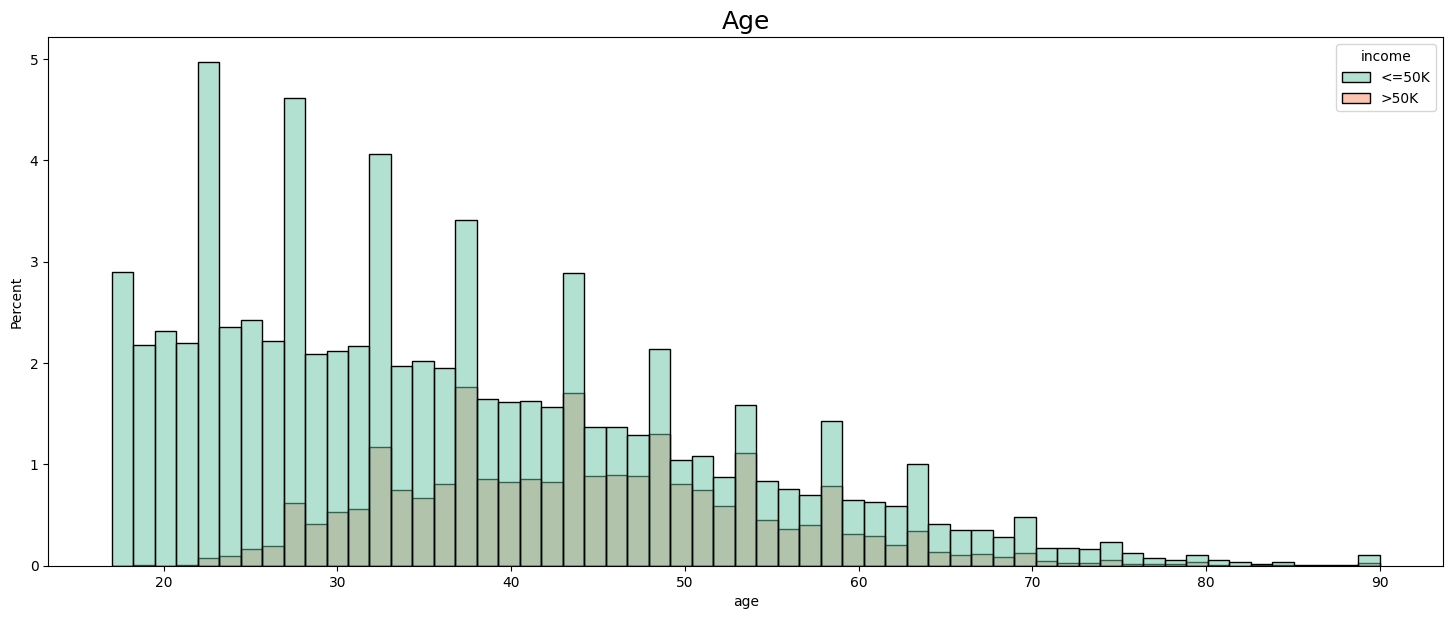

In [180]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='age', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Age', fontsize=18)
plt.show()

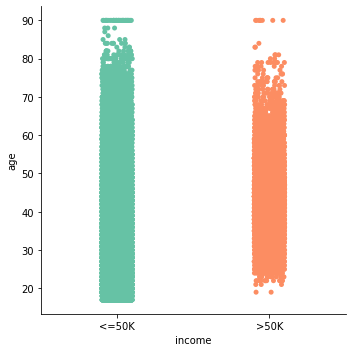

In [181]:
## Normalized Distribution

sns.catplot(x='income', y='age', data=train_df)

In [182]:
## Analysis of the feature

There is a tendency in the ages that often makes >50K, that is usually a middle age, not too young nor too old, those values can help to predict the Income.

### Fnlwgt

In [183]:
## Value Counts

train_df['fnlwgt'].value_counts()

203488    13
164190    13
123011    13
121124    12
126675    12
          ..
72208      1
115551     1
209174     1
103840     1
27620      1
Name: fnlwgt, Length: 21647, dtype: int64

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

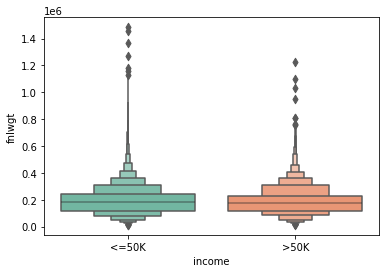

In [184]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='fnlwgt')

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

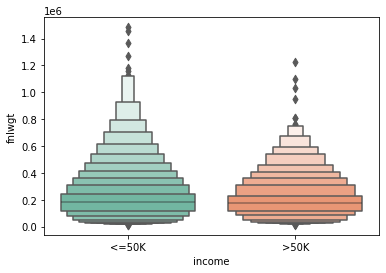

In [185]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='fnlwgt', scale='linear')

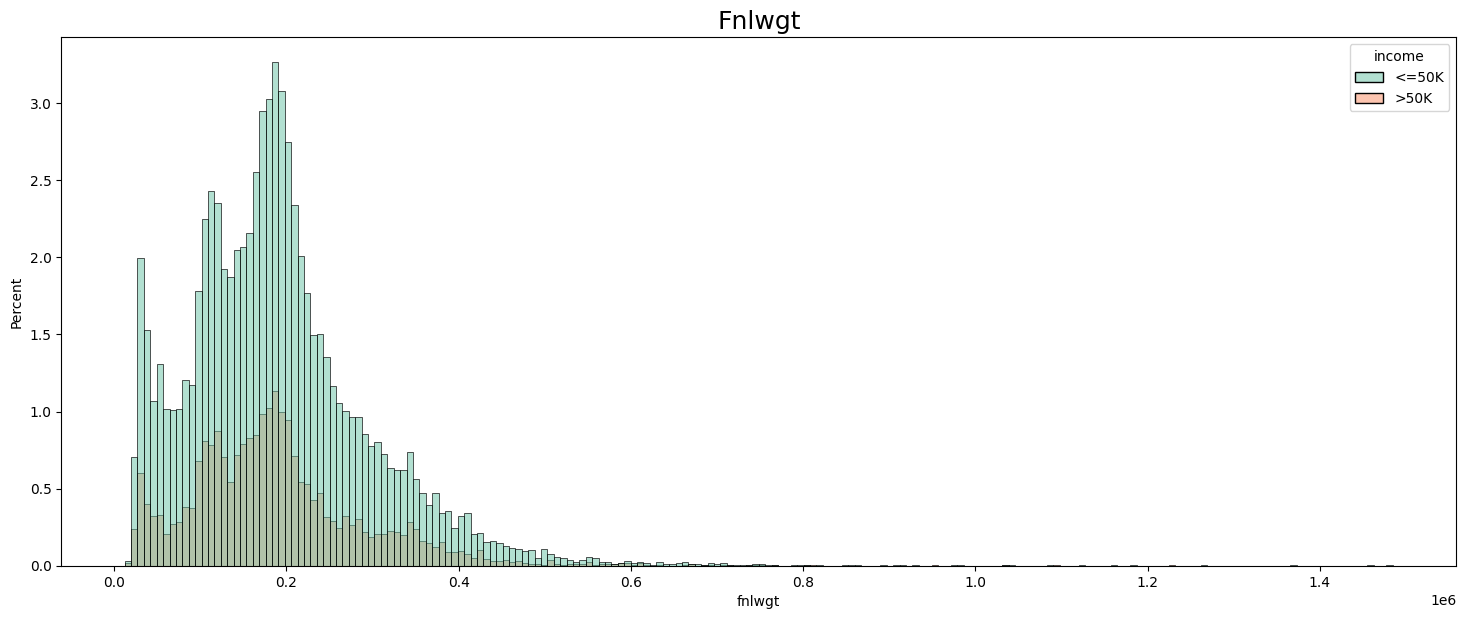

In [186]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='fnlwgt', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Fnlwgt', fontsize=18)
plt.show()

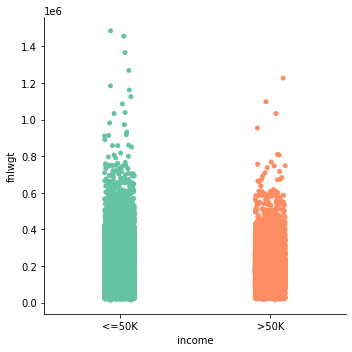

In [187]:
## Normalized Distribution

sns.catplot(x='income', y='fnlwgt', data=train_df)

In [188]:
## Analysis of the feature

The fnlwgt variable is the  final weight, i.e, the number of people the census believes the entry represents. This feature does not have a significant impact visually in the Boxen plots, so we shall not take it into consideration when training the classifier.

### Education Num

In [189]:
## Value Counts

train_df['education.num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

<AxesSubplot:xlabel='income', ylabel='education.num'>

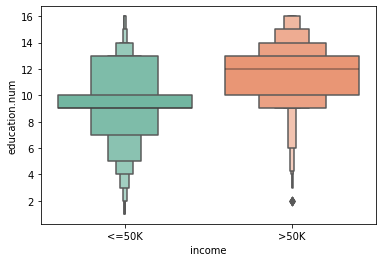

In [190]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='education.num')

<AxesSubplot:xlabel='income', ylabel='education.num'>

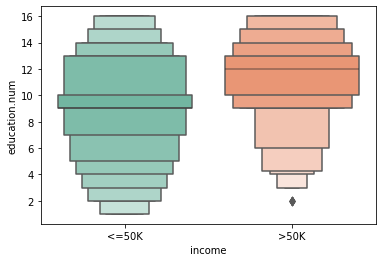

In [191]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='education.num', scale='linear')

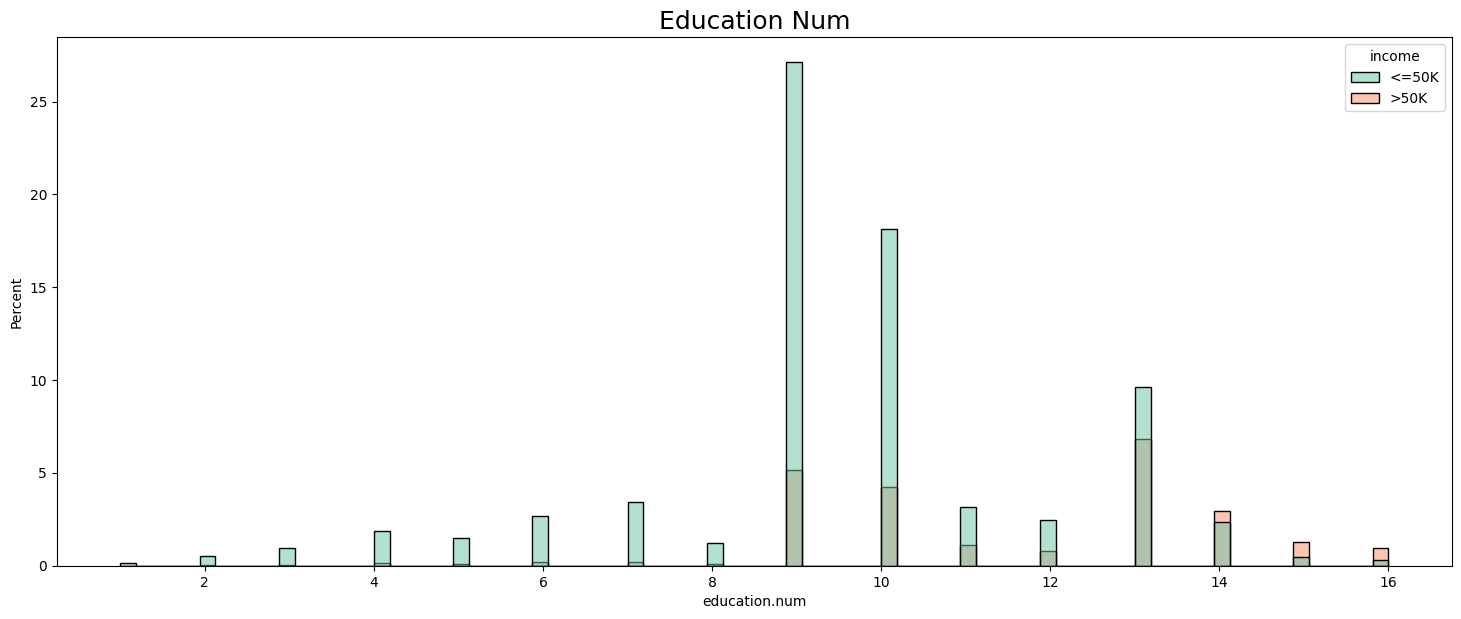

In [192]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='education.num', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Education Num', fontsize=18)
plt.show()

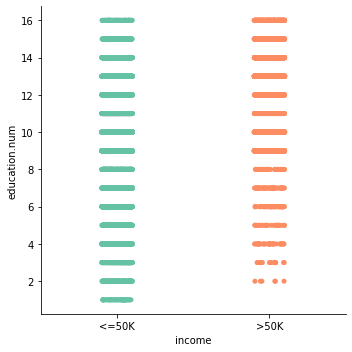

In [193]:
## Normalized Distribution

sns.catplot(x='income', y='education.num', data=train_df)

In [194]:
## Analysis of the feature

The education number clearly is an important variable and can help to predict the Income. Seen that the ones with the higher number of education tend to increase the Income.

### Capital Gain

In [195]:
## Value Counts

train_df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1455         1
6097         1
22040        1
7978         1
4931         1
Name: capital.gain, Length: 119, dtype: int64

<AxesSubplot:xlabel='income', ylabel='capital.gain'>

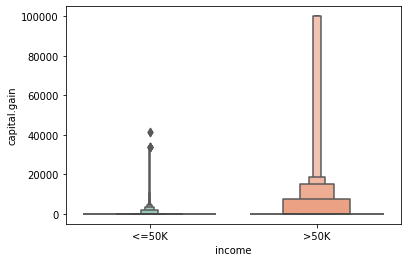

In [196]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='capital.gain')

<AxesSubplot:xlabel='income', ylabel='capital.gain'>

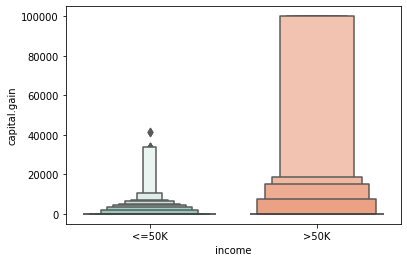

In [197]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='capital.gain', scale='linear')

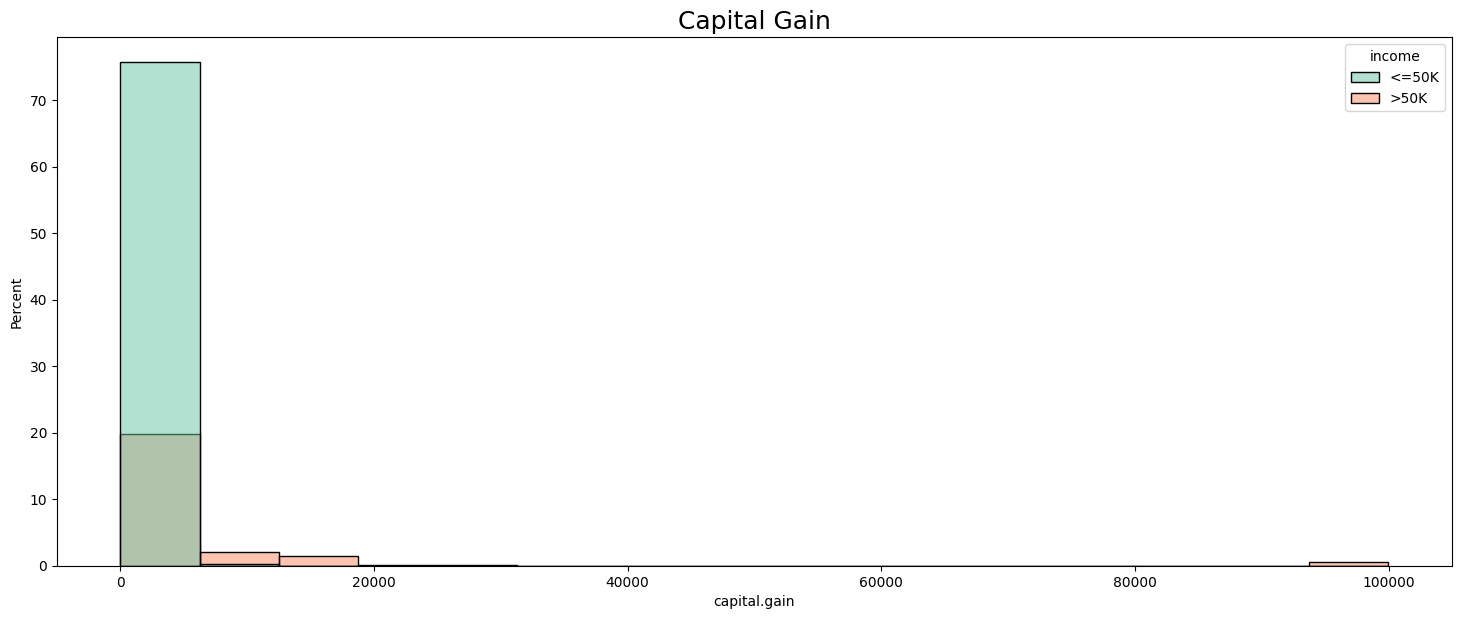

In [198]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='capital.gain', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Capital Gain', fontsize=18)
plt.show()

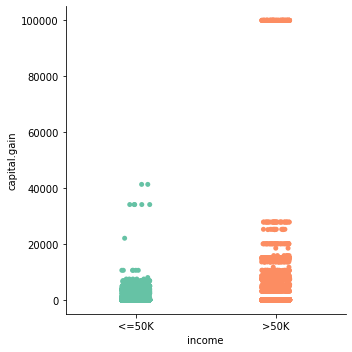

In [199]:
## Normalized Distribution

sns.catplot(x='income', y='capital.gain', data=train_df)

In [200]:
## Analysis of the feature

The capital gain, even though has many values as 0.0, contain an important outliers that represents the really wealthy that has a big capital gain, when computated, and that can be useful for the Income classification.

### Capital Loss

In [201]:
## Value Counts

train_df['capital.loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1944        1
2201        1
2282        1
2489        1
155         1
Name: capital.loss, Length: 92, dtype: int64

<AxesSubplot:xlabel='income', ylabel='capital.loss'>

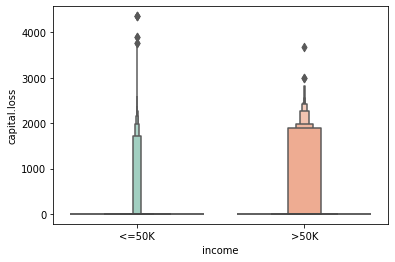

In [202]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='capital.loss')

<AxesSubplot:xlabel='income', ylabel='capital.loss'>

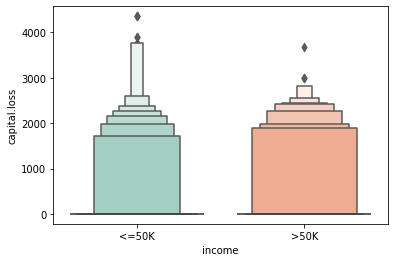

In [203]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='capital.loss', scale='linear')

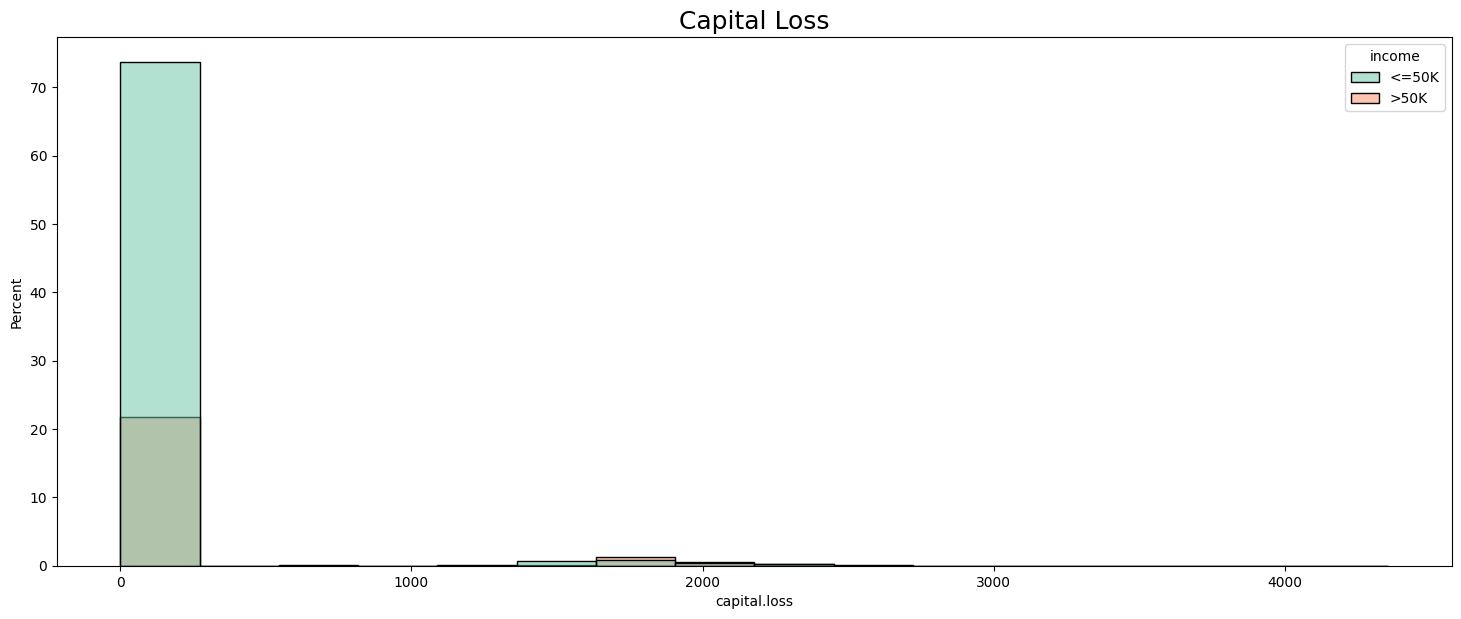

In [204]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='capital.loss', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Capital Loss', fontsize=18)
plt.show()

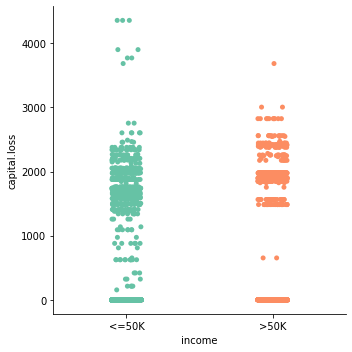

In [205]:
## Normalized Distribution

sns.catplot(x='income', y='capital.loss', data=train_df)

In [206]:
## Analysis of the feature

The capital loss values seem bigger for those who make >50K as Income, and that can be useful for the classification.

### Hours Per Week

In [207]:
## Value Counts

train_df['hours.per.week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
74        1
82        1
92        1
87        1
94        1
Name: hours.per.week, Length: 94, dtype: int64

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

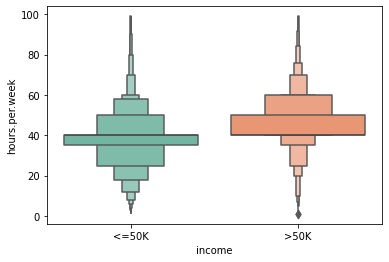

In [208]:
## Boxen plotting the feature

sns.boxenplot(data=train_df, x='income', y='hours.per.week')

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

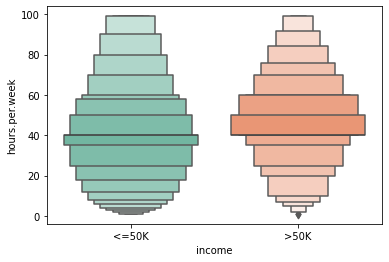

In [209]:
## Boxen plotting the feature in a Linear Scale

sns.boxenplot(data=train_df, x='income', y='hours.per.week', scale='linear')

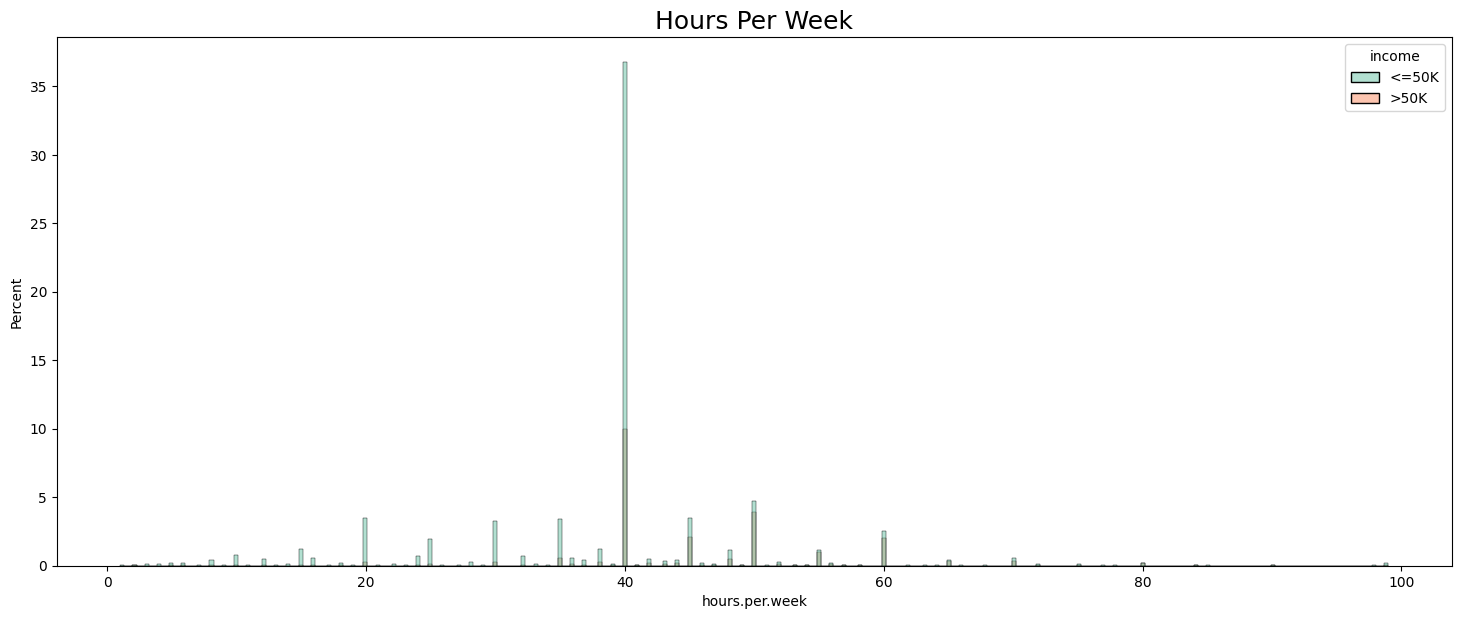

In [210]:
## A Histogram survey

plt.figure(figsize=(18,7), dpi=100)

sns.histplot(data=train_df, x='hours.per.week', multiple='layer', kde=False, stat='percent', hue='income')

plt.title('Hours Per Week', fontsize=18)
plt.show()

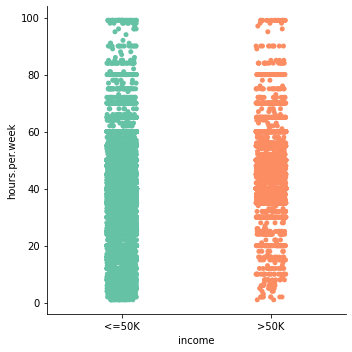

In [211]:
## Normalized Distribution

sns.catplot(x='income', y='hours.per.week', data=train_df)

In [212]:
## Analysis of the feature

There is clearly a tendency on those hours per week comparing <=50K and >50K, specially on the 40 hour/week range. This feature is, then, useful for the classifier training.

## Income - Our Target Variable

In [213]:
## Value Counts

train_df['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

<AxesSubplot:title={'center':'Income'}>

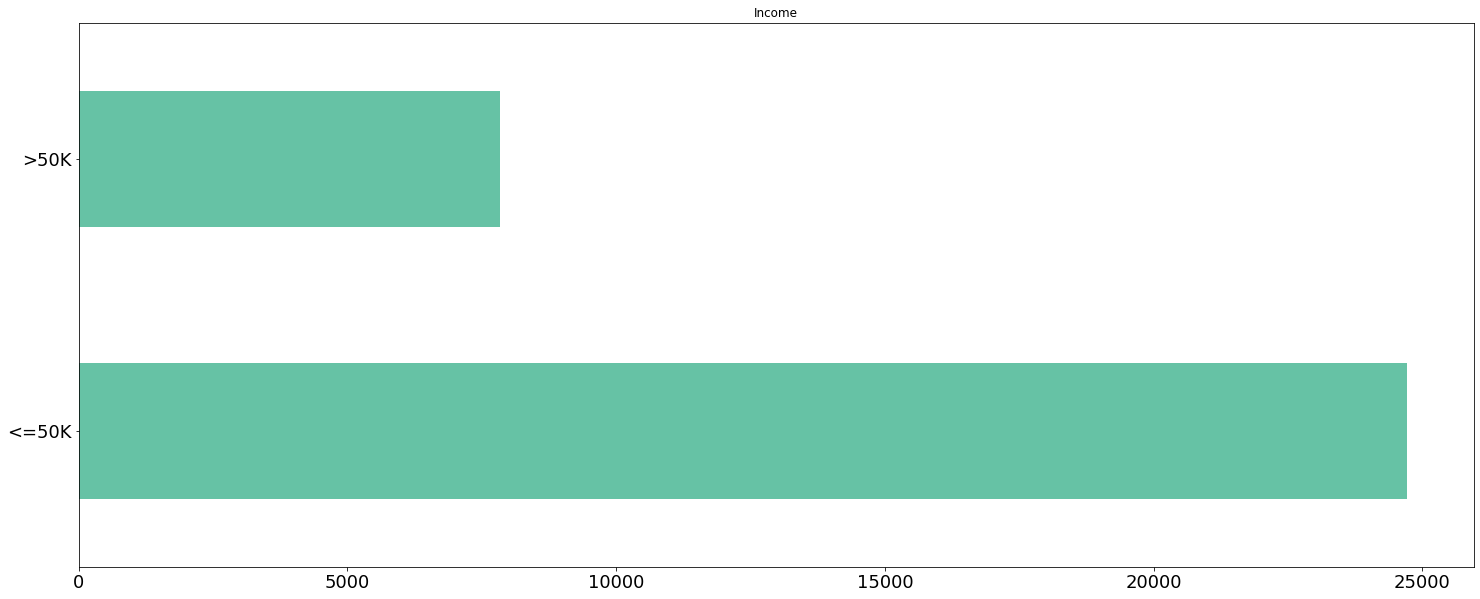

In [214]:
## Bar plotting the predicting feature

train_df['income'].value_counts().plot(kind='barh', figsize=(25,10), title='Income', fontsize=18)

# Feature Engineering

Let's remove the lines that are duplicate

In [265]:
## Training Dataset
train_df = train_df.drop_duplicates()

## Testing Dataset
test_df = test_df.drop_duplicates()

In [266]:
## Copying the df to change it a little

## Training Dataset
trainadult_df = train_df.copy()

## Testing Dataset
testadult_df = test_df.copy()

In [221]:
trainadult_df.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [222]:
testadult_df.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


Removing a few columns

In [223]:
########## Training Dataset ##########

## Where 1 is the axis number (0 for rows and 1 for columns.)

## We might remove, as mentioned before in each analysis, the following features:

## Id
trainadult_df = trainadult_df.drop('Id', axis=1)

## fnlwgt
trainadult_df = trainadult_df.drop('fnlwgt', axis=1)

## Native Country
trainadult_df = trainadult_df.drop('native.country', axis=1)

## Sex
trainadult_df = trainadult_df.drop('sex', axis=1)

## Race
trainadult_df = trainadult_df.drop('race', axis=1)

In [224]:
########## Testing Dataset ##########

## Where 1 is the axis number (0 for rows and 1 for columns.)

## We might remove, as mentioned before in each analysis, the following features:

## Id
testadult_df = testadult_df.drop('Id', axis=1)

## fnlwgt
testadult_df = testadult_df.drop('fnlwgt', axis=1)

## Native Country
testadult_df = testadult_df.drop('native.country', axis=1)

## Sex
testadult_df = testadult_df.drop('sex', axis=1) 

## Race
testadult_df = testadult_df.drop('race', axis=1)

In [225]:
trainadult_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,34,Private,Some-college,10,Divorced,Exec-managerial,Own-child,0,0,44,<=50K
1,58,Local-gov,10th,6,Married-civ-spouse,Transport-moving,Husband,0,0,40,<=50K
2,25,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,0,0,42,<=50K
3,24,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,0,0,40,<=50K
4,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,5178,0,60,>50K


In [226]:
testadult_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
0,25,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,0,0,44
1,64,State-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,45
2,31,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,0,0,40
3,45,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,0,0,40
4,64,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,50


In [227]:
trainadult_df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469
std,13.640642,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [228]:
testadult_df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,16280.000000,16280.000000,16280.00000,16280.000000,16280.000000
mean,38.768305,10.073096,1081.97156,87.904668,40.392260
std,13.849192,2.567511,7584.16416,403.117078,12.479715
min,17.000000,1.000000,0.00000,0.000000,1.000000
25%,28.000000,9.000000,0.00000,0.000000,40.000000
50%,37.000000,10.000000,0.00000,0.000000,40.000000
75%,48.000000,12.000000,0.00000,0.000000,45.000000
max,90.000000,16.000000,99999.00000,3770.000000,99.000000


In [229]:
trainadult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   education.num   32560 non-null  int64 
 4   marital.status  32560 non-null  object
 5   occupation      32560 non-null  object
 6   relationship    32560 non-null  object
 7   capital.gain    32560 non-null  int64 
 8   capital.loss    32560 non-null  int64 
 9   hours.per.week  32560 non-null  int64 
 10  income          32560 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.0+ MB


In [230]:
testadult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 0 to 16279
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   education       16280 non-null  object
 3   education.num   16280 non-null  int64 
 4   marital.status  16280 non-null  object
 5   occupation      16280 non-null  object
 6   relationship    16280 non-null  object
 7   capital.gain    16280 non-null  int64 
 8   capital.loss    16280 non-null  int64 
 9   hours.per.week  16280 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.4+ MB


## Encoding

Analyzing the columns that have missing values

In [231]:
## Replacing the missing values with "nan"

trainadult_df = trainadult_df.replace('?', np.nan)
testadult_df = testadult_df.replace('?', np.nan)

In [232]:
trainadult_df.isna().sum()

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [233]:
testadult_df.isna().sum()

age                 0
workclass         963
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
capital.gain        0
capital.loss        0
hours.per.week      0
dtype: int64

Some other imports

In [234]:
## LabelEncoder and Pipeline
from sklearn.preprocessing import LabelEncoder

## KNNImputer
from sklearn.impute import KNNImputer

## StandardScaler
from sklearn.preprocessing import StandardScaler

In [235]:
## Encoding the columns

label_enc = LabelEncoder()

columns_enc = ['income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship']

for column in columns_enc:
    trainadult_df[column] = label_enc.fit_transform(trainadult_df[column].astype(str))
    if column != 'income' :
        testadult_df[column] = label_enc.fit_transform(testadult_df[column].astype(str))

In [236]:
trainadult_df

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,34,3,15,10,0,3,3,0,0,44,0
1,58,1,0,6,2,13,0,0,0,40,0
2,25,3,15,10,4,6,1,0,0,42,0
3,24,3,15,10,0,0,1,0,0,40,0
4,57,4,11,9,2,13,0,5178,0,60,1
...,...,...,...,...,...,...,...,...,...,...,...
32555,42,3,12,14,2,9,0,7688,0,40,1
32556,23,3,11,9,4,6,4,0,0,40,0
32557,30,3,11,9,4,8,3,0,0,40,0
32558,18,3,11,9,4,0,1,0,0,25,0


In [237]:
testadult_df

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
0,25,3,9,13,4,9,1,0,0,44
1,64,6,9,13,2,3,0,0,0,45
2,31,3,12,14,0,3,1,0,0,40
3,45,3,11,9,4,6,3,0,0,40
4,64,4,9,13,2,3,0,0,0,50
...,...,...,...,...,...,...,...,...,...,...
16275,40,3,11,9,2,2,0,0,0,40
16276,30,1,11,9,2,7,0,0,0,40
16277,25,3,11,9,4,0,3,0,0,40
16278,60,3,12,14,4,3,1,3325,0,35


In [238]:
## Imputing values

imput = KNNImputer(n_neighbors=5)

## Train Dataset
trainadult_df[['occupation', 'workclass']] = imput.fit_transform(trainadult_df[['occupation', 'workclass']])

## Test Dataset
testadult_df[['occupation', 'workclass']] = imput.fit_transform(testadult_df[['occupation', 'workclass']])

In [239]:
## Normalize

scale = StandardScaler()

Standard_scaler = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week',
                   'workclass', 'education', 'marital.status', 'occupation', 'relationship']

## Training
trainadult_df[Standard_scaler] = scale.fit_transform(trainadult_df[Standard_scaler])

## Testing
testadult_df[Standard_scaler] = scale.fit_transform(testadult_df[Standard_scaler])

# Cross Validation for the Hyperparameter k

In [108]:
## Defining the input and expected output (target)

X_train = trainadult_df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship']]

Y_train = trainadult_df[['income']]

Some essencial imports for the analysis

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

The classifier must be a kNN where k is selected through cross validation;

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')

/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/luanareis/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

In [111]:
scores

array([0.81695332, 0.83108108, 0.83507371, 0.82002457, 0.83169533,
       0.83783784, 0.83077396, 0.81818182, 0.81941032, 0.82616708])

But, this Cross-Validation was made using K=3, let's estimate which K is the best one for this case by using Grid Search:

In [112]:
knn = KNeighborsClassifier()


# search for the best hyperparameter k
k_range = np.arange(13, 25, 2)
parameter_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


## Empirical Accuracy and Error Rate

In [113]:
print('the best parameter is:', grid_search.best_params_)

the best parameter is: {'n_neighbors': 19}


### Accuracy 

In [115]:
accuracy = grid_search.best_score_ * 100

print("Accuracy: {:.2f}%".format(accuracy) )

Accuracy: 84.40%


### Error Rate

In [117]:
error_rate = (1 - accuracy/100)*100

In [118]:
print("Error: {:.2f}%".format(error_rate) )

Error: 15.60%


### Exporting

Export to a .csv file

In [261]:
knn = KNeighborsClassifier(n_neighbors=10)

## Training
knn.fit(X_train,Y_train.values.ravel())

## Predicting
Y_predict = knn.predict(testadult_df)

In [262]:
## Results

final = pd.DataFrame(columns = ['Id','income'])

final.Id = test_df.Id
                                 
final.income = Y_predict
                      
final.income = final.income.replace(0, '<=50K')
                                 
final.income = final.income.replace(1, '>50K')
                                 
final.to_csv('submission.csv', index=False)

In [263]:
testadult_df

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
0,-0.994190,-0.252895,-0.326974,1.140012,0.905290,0.582388,-0.274375,-0.142666,-0.218069,0.289097
1,1.821945,1.616261,-0.326974,1.140012,-0.418711,-0.802953,-0.902178,-0.142666,-0.218069,0.369230
2,-0.560938,-0.252895,0.445764,1.529506,-1.742712,-0.802953,-0.274375,-0.142666,-0.218069,-0.031433
3,0.449982,-0.252895,0.188185,-0.417965,0.905290,-0.110283,0.981232,-0.142666,-0.218069,-0.031433
4,1.821945,0.370157,-0.326974,1.140012,-0.418711,-0.802953,-0.902178,-0.142666,-0.218069,0.769892
...,...,...,...,...,...,...,...,...,...,...
16275,0.088939,-0.252895,0.188185,-0.417965,-0.418711,-1.033844,-0.902178,-0.142666,-0.218069,-0.031433
16276,-0.633147,-1.498998,0.188185,-0.417965,-0.418711,0.120608,-0.902178,-0.142666,-0.218069,-0.031433
16277,-0.994190,-0.252895,0.188185,-0.417965,0.905290,-1.495624,0.981232,-0.142666,-0.218069,-0.031433
16278,1.533111,-0.252895,0.445764,1.529506,0.905290,-0.802953,-0.274375,0.295761,-0.218069,-0.432095


In [264]:
final

,Id,income
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,<=50K
4,4,<=50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K
